<a href="https://colab.research.google.com/github/Malleshcr7/AI-ML-Projects/blob/main/Linear_Regression_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#House Price Prediction Project
#Introduction
This project demonstrates how to build a simple house price prediction model using a dataset from GitHub. We'll use linear regression to predict house prices based on various features like square footage, number of bedrooms, bathrooms, and other characteristics.

 Import Libraries and Load Data

In [55]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import warnings
warnings.filterwarnings('ignore')


# Load the dataset

In [56]:
# Load dataset from GitHub
url = "https://raw.githubusercontent.com/ageron/handson-ml/master/datasets/housing/housing.csv"
housing_df = pd.read_csv(url)

# Display basic information about the dataset
print("Dataset shape:", housing_df.shape)
print("\nFirst 5 rows of the dataset:")
housing_df.head()

Dataset shape: (20640, 10)

First 5 rows of the dataset:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


Initial Data Exploration

In [57]:
# Display dataset information
print("Dataset Information:")
print(housing_df.info())

print("\n" + "="*50)
print("Statistical Summary:")
housing_df.describe()

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB
None

Statistical Summary:


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [58]:
# Check for missing values
print("Missing Values in Each Column:")
missing_data = housing_df.isnull().sum()
print(missing_data[missing_data > 0])

print("\n" + "="*50)
print("Dataset Columns:")
print(housing_df.columns.tolist())

Missing Values in Each Column:
total_bedrooms    207
dtype: int64

Dataset Columns:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income', 'median_house_value', 'ocean_proximity']


#Data Visualization
Let's visualize the data to understand relationships between variables and the target (median_house_value).

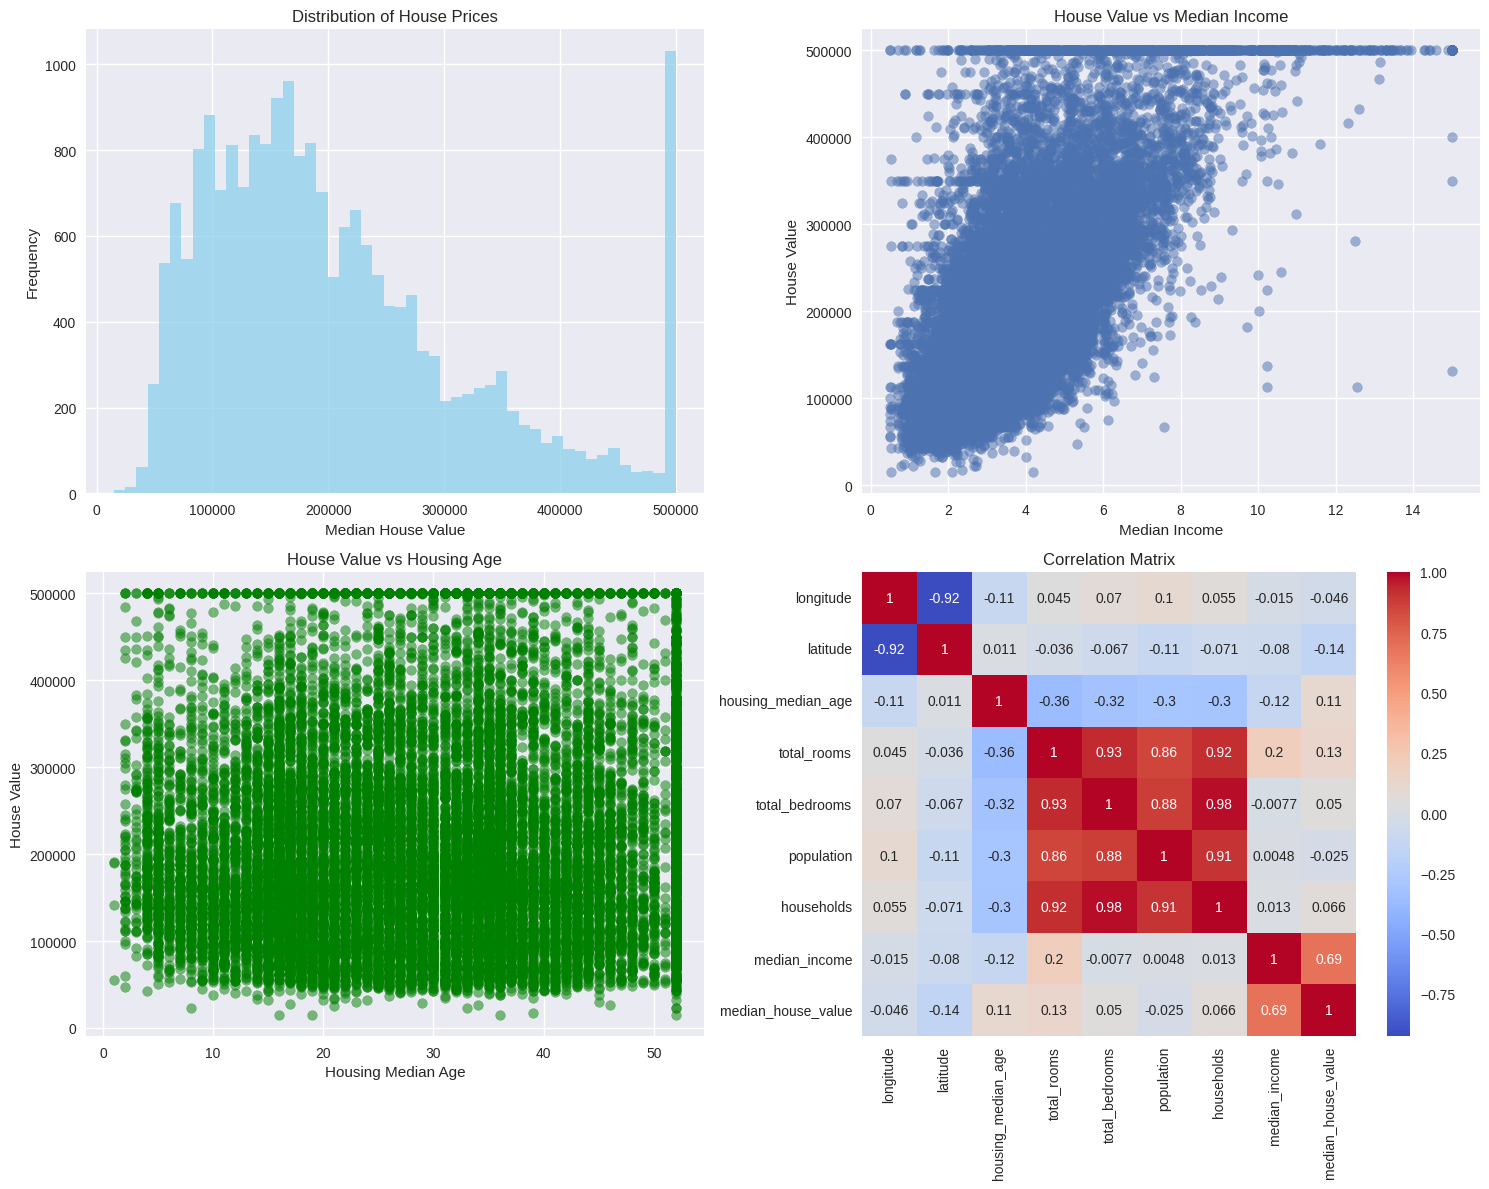

In [59]:
# Set up the plotting style
plt.style.use('seaborn-v0_8')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# Plot 1: Distribution of house prices
axes[0,0].hist(housing_df['median_house_value'], bins=50, alpha=0.7, color='skyblue')
axes[0,0].set_xlabel('Median House Value')
axes[0,0].set_ylabel('Frequency')
axes[0,0].set_title('Distribution of House Prices')

# Plot 2: House prices vs median income
axes[0,1].scatter(housing_df['median_income'], housing_df['median_house_value'], alpha=0.5)
axes[0,1].set_xlabel('Median Income')
axes[0,1].set_ylabel('House Value')
axes[0,1].set_title('House Value vs Median Income')

# Plot 3: House prices vs housing median age
axes[1,0].scatter(housing_df['housing_median_age'], housing_df['median_house_value'], alpha=0.5, color='green')
axes[1,0].set_xlabel('Housing Median Age')
axes[1,0].set_ylabel('House Value')
axes[1,0].set_title('House Value vs Housing Age')

# Plot 4: Correlation heatmap (numerical features only)
numerical_df = housing_df.select_dtypes(include=[np.number])
correlation_matrix = numerical_df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', ax=axes[1,1])
axes[1,1].set_title('Correlation Matrix')

plt.tight_layout()
plt.show()

Data Preprocessing

In [60]:
# Handle missing values
print("Handling missing values...")
print(f"Missing values before processing: {housing_df.isnull().sum().sum()}")

# Fill missing values in total_bedrooms with median
housing_df['total_bedrooms'].fillna(housing_df['total_bedrooms'].median(), inplace=True)

print(f"Missing values after processing: {housing_df.isnull().sum().sum()}")

Handling missing values...
Missing values before processing: 207
Missing values after processing: 0


Prepare Features and Target

In [61]:
print("=" * 50)
print("FEATURE AND TARGET PREPARATION")
print("=" * 50)

# Separate features (X) and target variable (y)
X = model_df.drop('SpendAmount', axis=1)
y = model_df['SpendAmount']

print(f"Features shape: {X.shape}")
print(f"Target shape: {y.shape}")

# Display feature names
print("\nFeature Names:")
print(X.columns.tolist())

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, shuffle=True
)

print(f"\nTraining set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

FEATURE AND TARGET PREPARATION
Features shape: (1000, 32)
Target shape: (1000,)

Feature Names:
['Age', 'Income', 'TenureDays', 'TenureYears', 'DaysSinceLastPurchase', 'CustomerValueScore', 'RecentCustomer', 'AgeGroup_26-35', 'AgeGroup_36-45', 'AgeGroup_46-55', 'AgeGroup_56+', 'IncomeCategory_Low', 'IncomeCategory_Medium', 'IncomeCategory_Medium-High', 'IncomeCategory_Medium-Low', 'City_Houston', 'City_Los Angeles', 'City_New York', 'Country_India', 'Country_UK', 'Country_USA', 'ProductCategory_Clothing', 'ProductCategory_Electronics', 'ProductCategory_Home & Garden', 'SpendCategory_Low', 'SpendCategory_Medium', 'SpendCategory_Very High', 'SpendCategory_Very Low', 'AccountStatus_Inactive', 'AccountStatus_Suspended', 'SignupYear', 'SignupMonth']

Training set size: 800 samples
Testing set size: 200 samples
Number of features: 32


 Feature Selection

In [62]:
# Feature selection - choose relevant numerical features for our model
# We'll exclude latitude and longitude for simplicity in this basic model
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
           'total_bedrooms', 'population', 'households', 'median_income']

X = housing_df[features]
y = housing_df['median_house_value']

print("Feature matrix shape:", X.shape)
print("Target variable shape:", y.shape)

print("\nSelected features:")
print(X.columns.tolist())

Feature matrix shape: (20640, 8)
Target variable shape: (20640,)

Selected features:
['longitude', 'latitude', 'housing_median_age', 'total_rooms', 'total_bedrooms', 'population', 'households', 'median_income']


Train-Test Split

In [63]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Training set size: {X_train.shape[0]} samples")
print(f"Testing set size: {X_test.shape[0]} samples")
print(f"Number of features: {X_train.shape[1]}")

Training set size: 16512 samples
Testing set size: 4128 samples
Number of features: 8


Model Training

In [64]:
# Create and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

print("Model training completed!")
print(f"Model coefficients: {model.coef_}")
print(f"Model intercept: {model.intercept_:.2f}")

Model training completed!
Model coefficients: [-4.26323917e+04 -4.24500719e+04  1.18280965e+03 -8.18797708e+00
  1.16260128e+02 -3.84922131e+01  4.63425720e+01  4.05384044e+04]
Model intercept: -3578224.23


Model Evaluation

In [65]:
# Make predictions
y_train_pred = model.predict(X_train)
y_test_pred = model.predict(X_test)

# Calculate evaluation metrics
train_mae = mean_absolute_error(y_train, y_train_pred)
train_mse = mean_squared_error(y_train, y_train_pred)
train_r2 = r2_score(y_train, y_train_pred)

test_mae = mean_absolute_error(y_test, y_test_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
test_r2 = r2_score(y_test, y_test_pred)

print("=== TRAINING SET PERFORMANCE ===")
print(f"Mean Absolute Error (MAE): ${train_mae:,.2f}")
print(f"Mean Squared Error (MSE): ${train_mse:,.2f}")
print(f"R-squared Score: {train_r2:.4f}")

print("\n=== TEST SET PERFORMANCE ===")
print(f"Mean Absolute Error (MAE): ${test_mae:,.2f}")
print(f"Mean Squared Error (MSE): ${test_mse:,.2f}")
print(f"R-squared Score: {test_r2:.4f}")

print(f"\nRoot Mean Squared Error (RMSE) on test set: ${np.sqrt(test_mse):,.2f}")

=== TRAINING SET PERFORMANCE ===
Mean Absolute Error (MAE): $50,626.79
Mean Squared Error (MSE): $4,811,134,397.88
R-squared Score: 0.6401

=== TEST SET PERFORMANCE ===
Mean Absolute Error (MAE): $51,810.48
Mean Squared Error (MSE): $5,059,928,371.17
R-squared Score: 0.6139

Root Mean Squared Error (RMSE) on test set: $71,133.17


Visualization of Predictions vs Actual Values

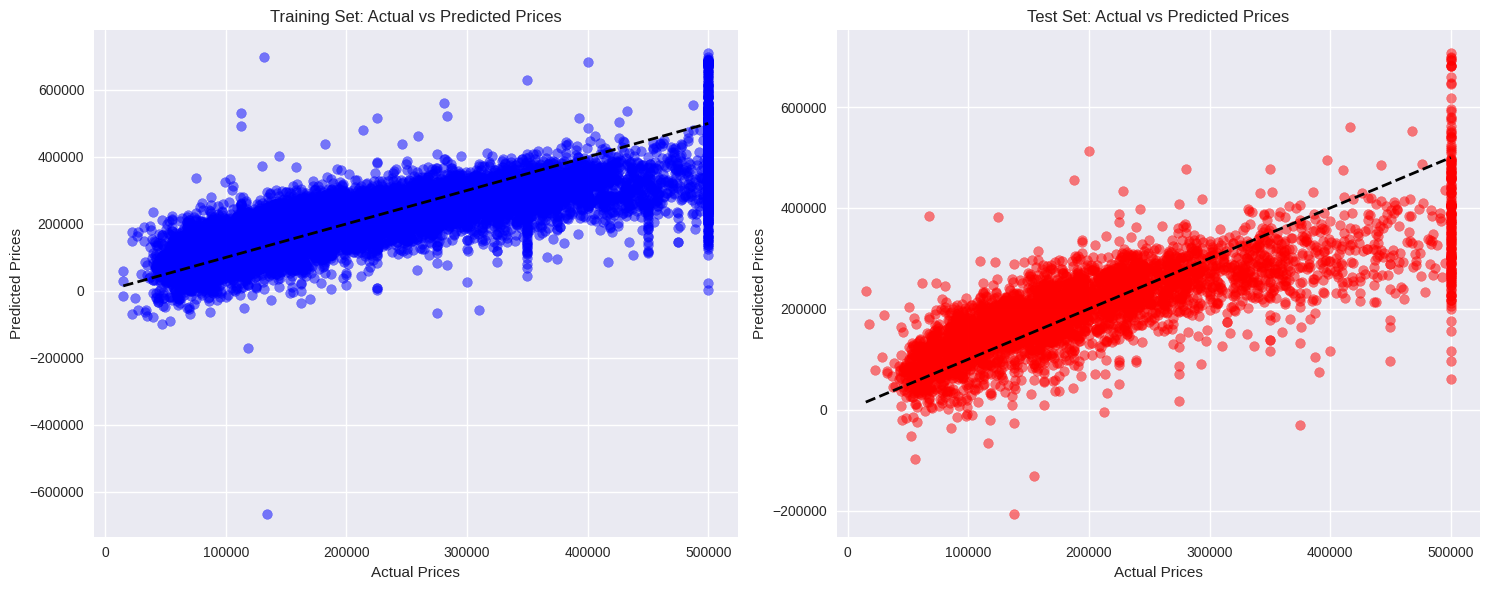

In [66]:
# Create visualization for predictions vs actual values
fig, axes = plt.subplots(1, 2, figsize=(15, 6))

# Training set predictions vs actual
axes[0].scatter(y_train, y_train_pred, alpha=0.5, color='blue')
axes[0].plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=2)
axes[0].set_xlabel('Actual Prices')
axes[0].set_ylabel('Predicted Prices')
axes[0].set_title('Training Set: Actual vs Predicted Prices')

# Test set predictions vs actual
axes[1].scatter(y_test, y_test_pred, alpha=0.5, color='red')
axes[1].plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
axes[1].set_xlabel('Actual Prices')
axes[1].set_ylabel('Predicted Prices')
axes[1].set_title('Test Set: Actual vs Predicted Prices')

plt.tight_layout()
plt.show()

Feature Importance

Feature Importance (by coefficient magnitude):
              Feature   Coefficient  Absolute_Coefficient
0           longitude -42632.391717          42632.391717
1            latitude -42450.071864          42450.071864
7       median_income  40538.404387          40538.404387
2  housing_median_age   1182.809649           1182.809649
4      total_bedrooms    116.260128            116.260128
6          households     46.342572             46.342572
5          population    -38.492213             38.492213
3         total_rooms     -8.187977              8.187977


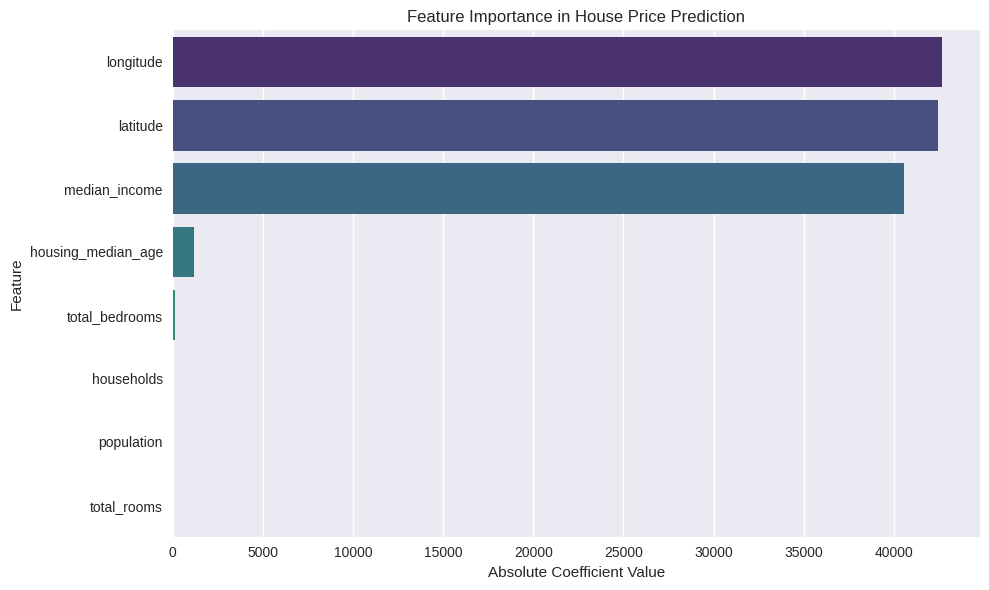

In [67]:
# Display feature importance
feature_importance = pd.DataFrame({
    'Feature': features,
    'Coefficient': model.coef_,
    'Absolute_Coefficient': np.abs(model.coef_)
}).sort_values('Absolute_Coefficient', ascending=False)

print("Feature Importance (by coefficient magnitude):")
print(feature_importance)

# Plot feature importance
plt.figure(figsize=(10, 6))
sns.barplot(data=feature_importance, x='Absolute_Coefficient', y='Feature', palette='viridis')
plt.title('Feature Importance in House Price Prediction')
plt.xlabel('Absolute Coefficient Value')
plt.tight_layout()
plt.show()

Making Predictions on New Data

In [68]:
# Create sample new data for prediction
new_house_data = {
    'longitude': [-122.25],
    'latitude': [37.85],
    'housing_median_age': [25],
    'total_rooms': [2800],
    'total_bedrooms': [500],
    'population': [1200],
    'households': [450],
    'median_income': [5.0]
}

new_house_df = pd.DataFrame(new_house_data)

# Ensure the column order matches the training data
new_house_df = new_house_df[features]

print("New house data for prediction:")
print(new_house_df)

# Make prediction
predicted_price = model.predict(new_house_df)[0]

print(f"\nPredicted house price: ${predicted_price:,.2f}")

New house data for prediction:
   longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
0    -122.25     37.85                  25         2800             500   

   population  households  median_income  
0        1200         450            5.0  

Predicted house price: $268,979.93
